<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descripción-del-Dataset" data-toc-modified-id="Descripción-del-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descripción del Dataset</a></span></li><li><span><a href="#Carga-de-datos" data-toc-modified-id="Carga-de-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Carga de datos</a></span></li><li><span><a href="#Análisis-exploratorio,--EDA" data-toc-modified-id="Análisis-exploratorio,--EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Análisis exploratorio,  EDA</a></span><ul class="toc-item"><li><span><a href="#Análisis-exploratorio-visual" data-toc-modified-id="Análisis-exploratorio-visual-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Análisis exploratorio visual</a></span><ul class="toc-item"><li><span><a href="#Variable-respuesta" data-toc-modified-id="Variable-respuesta-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Variable respuesta</a></span></li><li><span><a href="#Variables-catégoricas" data-toc-modified-id="Variables-catégoricas-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Variables catégoricas</a></span></li><li><span><a href="#Variables-continuas" data-toc-modified-id="Variables-continuas-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Variables continuas</a></span></li></ul></li><li><span><a href="#Gráfico-de-correlación--o-Heatmap" data-toc-modified-id="Gráfico-de-correlación--o-Heatmap-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Gráfico de correlación  o <em>Heatmap</em></a></span></li></ul></li><li><span><a href="#Preprocesamiento" data-toc-modified-id="Preprocesamiento-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preprocesamiento</a></span><ul class="toc-item"><li><span><a href="#Outliers" data-toc-modified-id="Outliers-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Outliers</a></span></li></ul></li><li><span><a href="#Estandarización" data-toc-modified-id="Estandarización-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Estandarización</a></span></li><li><span><a href="#Codificación" data-toc-modified-id="Codificación-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Codificación</a></span></li><li><span><a href="#Ajuste-de-modelo" data-toc-modified-id="Ajuste-de-modelo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ajuste de modelo</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Decision Tree Classifier</a></span><ul class="toc-item"><li><span><a href="#Selección-de-hiperparámetros" data-toc-modified-id="Selección-de-hiperparámetros-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Selección de hiperparámetros</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#KNeighborsClassifier" data-toc-modified-id="KNeighborsClassifier-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>KNeighborsClassifier</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Gradient Boosting</a></span></li></ul></li></ul></div>

In [162]:
import pandas as pd
import numpy as np

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder  

from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Descripción del Dataset

**Variables**

- `age` -> edad en años


- `sex` -> M = masculino; F = femenino


- `ChestPainType` -> tipo de dolor de pecho


    - TA: Angina típica: dolor en el pecho relacionado con la disminución del suministro de sangre al corazón
    
    - ATA: Angina atípica: dolor en el pecho no relacionado con el corazón
    
    - NAP: No dolor de angina: típicamente espasmos esofágicos (no relacionados con el corazón)
    
    - ASY: Asintomáticos: dolor en el pecho que no muestra signos de enfermedad
    
- `RestingBP` -> resultados del electrocardiograma

    - Normal: Normal
    
    - ST: tener una anormalidad de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de > 0,05 mV) 
    
    - LVH:  que muestren una hipertrofia ventricular izquierda probable o definida según los criterios de Estes  
    

- `Cholesterol` -> colesterol sérico en mg/dl

    - suero = LDL + HDL + .2 * trigliceridos
    
    - por encima de 200 es motivo de preocupación
    
- `FastingBS` -> (glucemia en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)

    - '>126' mg/dL señal de diabetes


- `RestingECG` -> resto resultados electrocardiograma

    - Normal: nada que destacar
    
    - ST:  anomralidad en la curva: 
        - puede variar desde síntomas leves hasta problemas graves
        - señales de latidos cardíacos no normales
        
    - LVH: hipertrofia ventricular izquierda posible o definitiva
        - Agrandamiento de la cámara de bombeo principal del corazón
        
        
- `MaxHR` -> frecuencia cardíaca máxima alcanzada


- `Exercise Angina` -> agina inducida por ejercicio 

    - 1 = si
    
    - 0 = no


- `oldpeak` -> la depresión del ST inducida por el ejercicio en relación con el reposo examina el estrés del corazón durante el ejercicio Un corazón poco saludable se estresará más


- `ST-Slope` -> la pendiente del segmento ST máximo del ejercicio

    - Up: Pendiente ascendente: mejora de la frecuencia cardíaca con el ejercicio (poco común)
    
    - Flat: Pendiente plana: cambio mínimo (corazón sano típico)
    
    - Down: Pendiente descendente: signos de un corazón poco saludable

    
    
- `HeartDisease` -> si ha tenido infarto o no (la variable respuesta). 

    - 1 = si
    - 0 = no


# Carga de datos  

In [163]:
# cargamos el dataset
df = pd.read_csv("data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Análisis exploratorio,  EDA

In [164]:
# Cuantas filas y columnas tenemos
df.shape

(918, 12)

In [165]:
# Cuántos valores nulos tenemos en el dataset
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [166]:
# Cuántos valores nulos tenemos en el dataset
df.duplicated().sum()

0

📌 Parece que el dataset está muy limpio!!! **NO** tenemos valores nulos ni duplicados 🙃

In [167]:
# Exploramos los tipos de los datos que tenemos
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [168]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [169]:
df["FastingBS"] = df["FastingBS"].astype("category")

In [170]:
df.dtypes

Age                  int64
Sex                 object
ChestPainType       object
RestingBP            int64
Cholesterol          int64
FastingBS         category
RestingECG          object
MaxHR                int64
ExerciseAngina      object
Oldpeak            float64
ST_Slope            object
HeartDisease         int64
dtype: object

In [171]:
# exploramos variables categóricas

df.describe(include  = ["object", "category"]).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
FastingBS,918,2,0,704
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


## Análisis exploratorio visual

En este apartado se realizarán una serie de gráficos para entender el problema y entender cuales son las principales características que determinan que una persona sufra un infarto de corazón o no. Para ello, se usará la visualización a través de las herramientas de seaborn y matplotlib

### Variable respuesta 

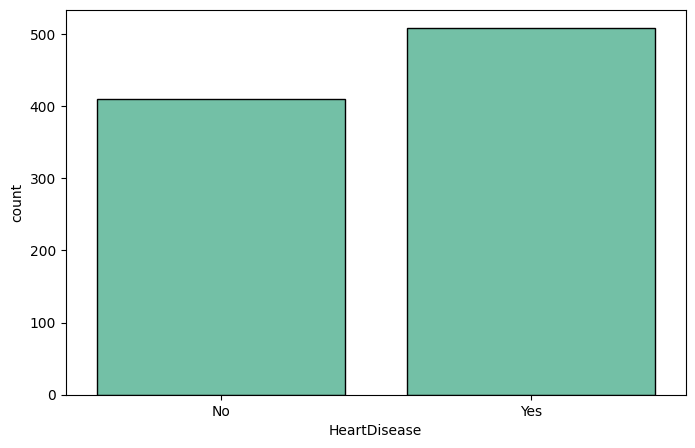

In [172]:
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df, x = "HeartDisease",  color = "mediumaquamarine",  edgecolor='black'); 
fig1.set(xticklabels=["No", "Yes"]) 
plt.show();

In [173]:
df["HeartDisease"].value_counts() / df.shape[0]

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

📌  Tenemos 508 personas con enfermedades del corazón y 410 personas sin enfermedades del corazón, así queno tenemos problemas de desbalanceo. 

### Variables catégoricas 

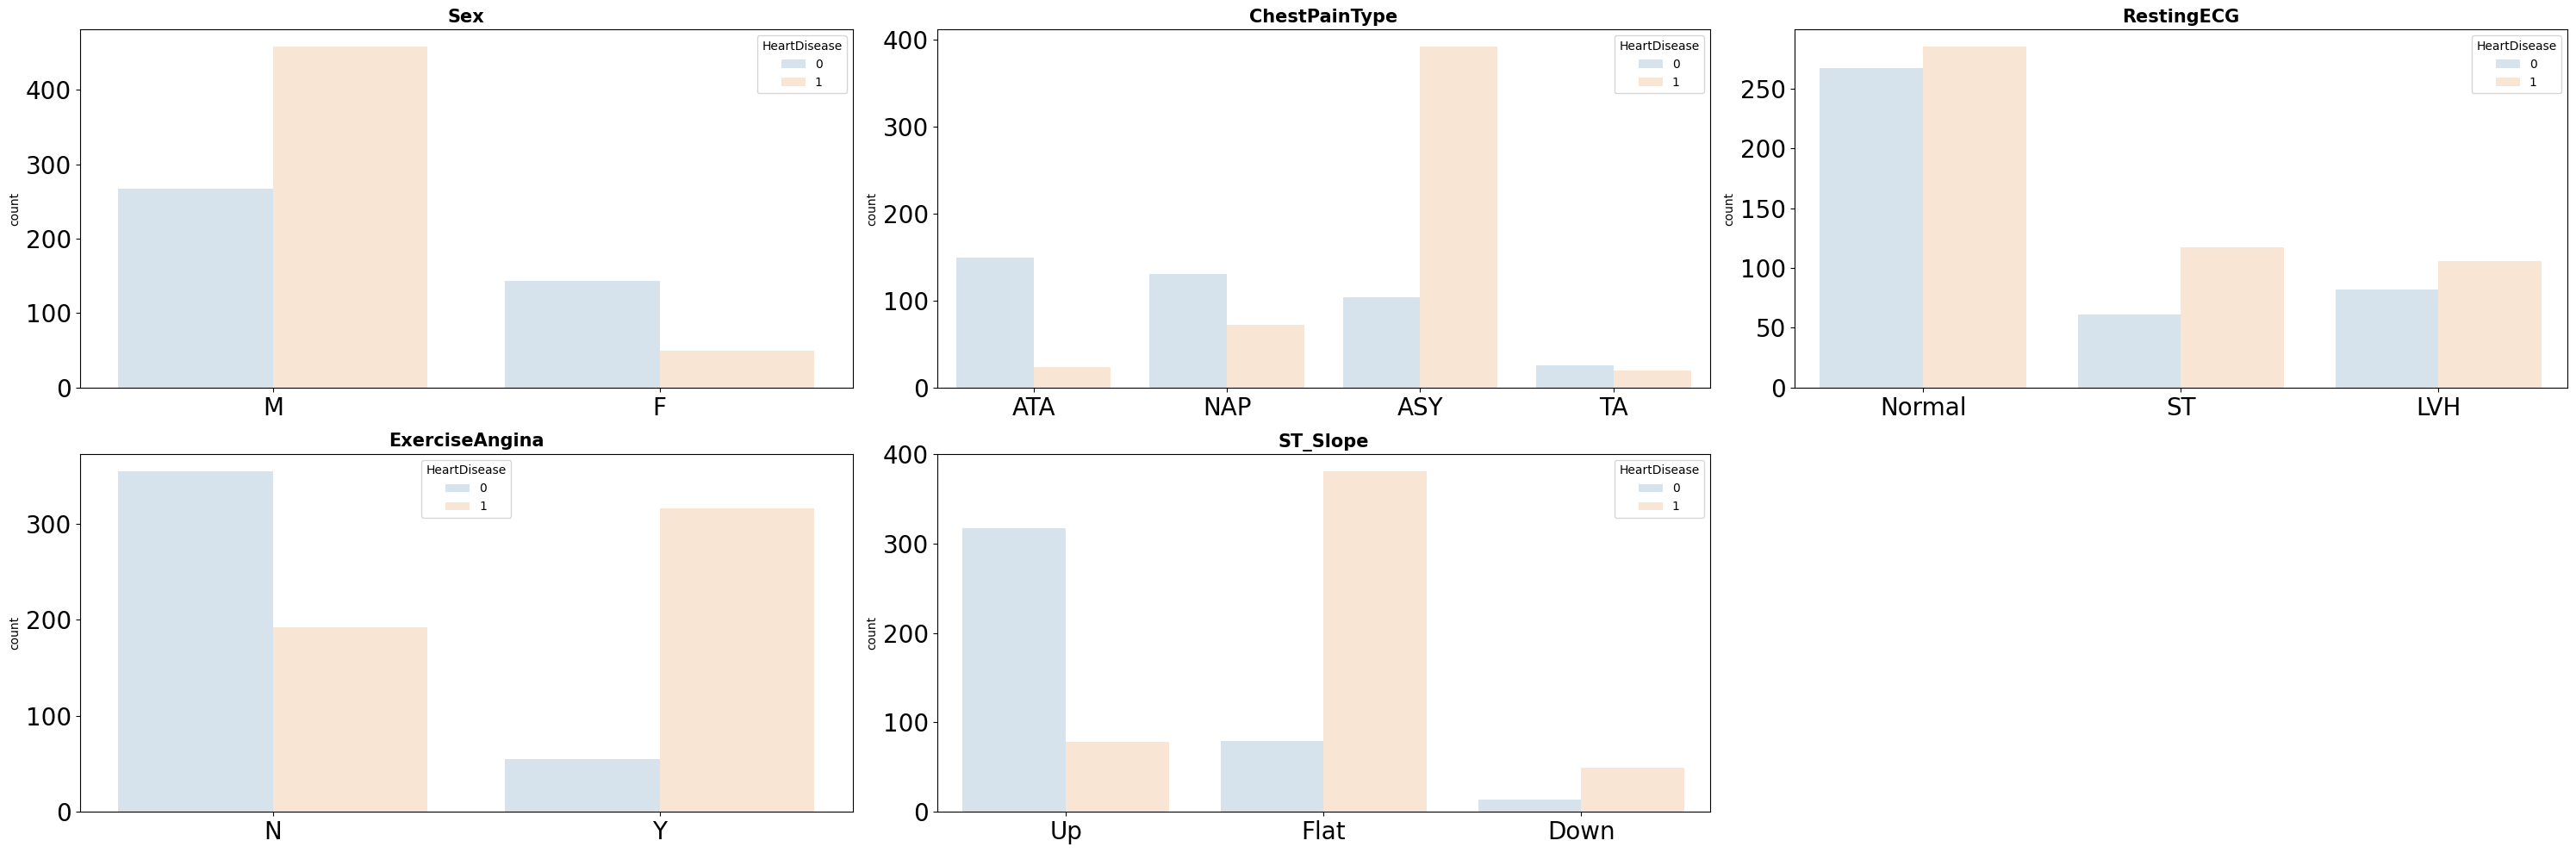

In [174]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))


axes = axes.flat

columnas_cat = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "HeartDisease",
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.delaxes(axes[5])
fig.tight_layout();

**Resumen**
> Las principales conclusiones del análisis de variables categóricas son: 
> - Observando el tipo de `dolor torácico (CP)`, las personas sin enfermedad parecen tener muchos menos casos en las variaciones 1, 2 y 3, y los pacientes con la enfermedad tienden a tener un valor de 0, que son casos asintomáticos.
> - Un tipo de resultado similar es el de la `angina de pecho` inducida por el ejercicio, con un 80% de pacientes sin enfermedad cardíaca que no la padecen por hacer demasiado ejercicio.
> - Los resultados del `electrocardiograma` en reposo son bastante interesantes. Hay alrededor de un 10% más de personas con una enfermedad cardíaca declarada que tienen una hipertrofia ventricular izquierda definida. Y alrededor de un 40% más de personas sin enfermedad cardíaca tienen un restecg normal.
> - Los `FastingBS` parecen tener las mismas proporciones tanto para los pacientes con cardiopatía como para los que no la padecen. 
> - Los pacientes no llegan al hospital resultado de un ejercicio intenso (ExerciseAngina) 


###  Variables continuas

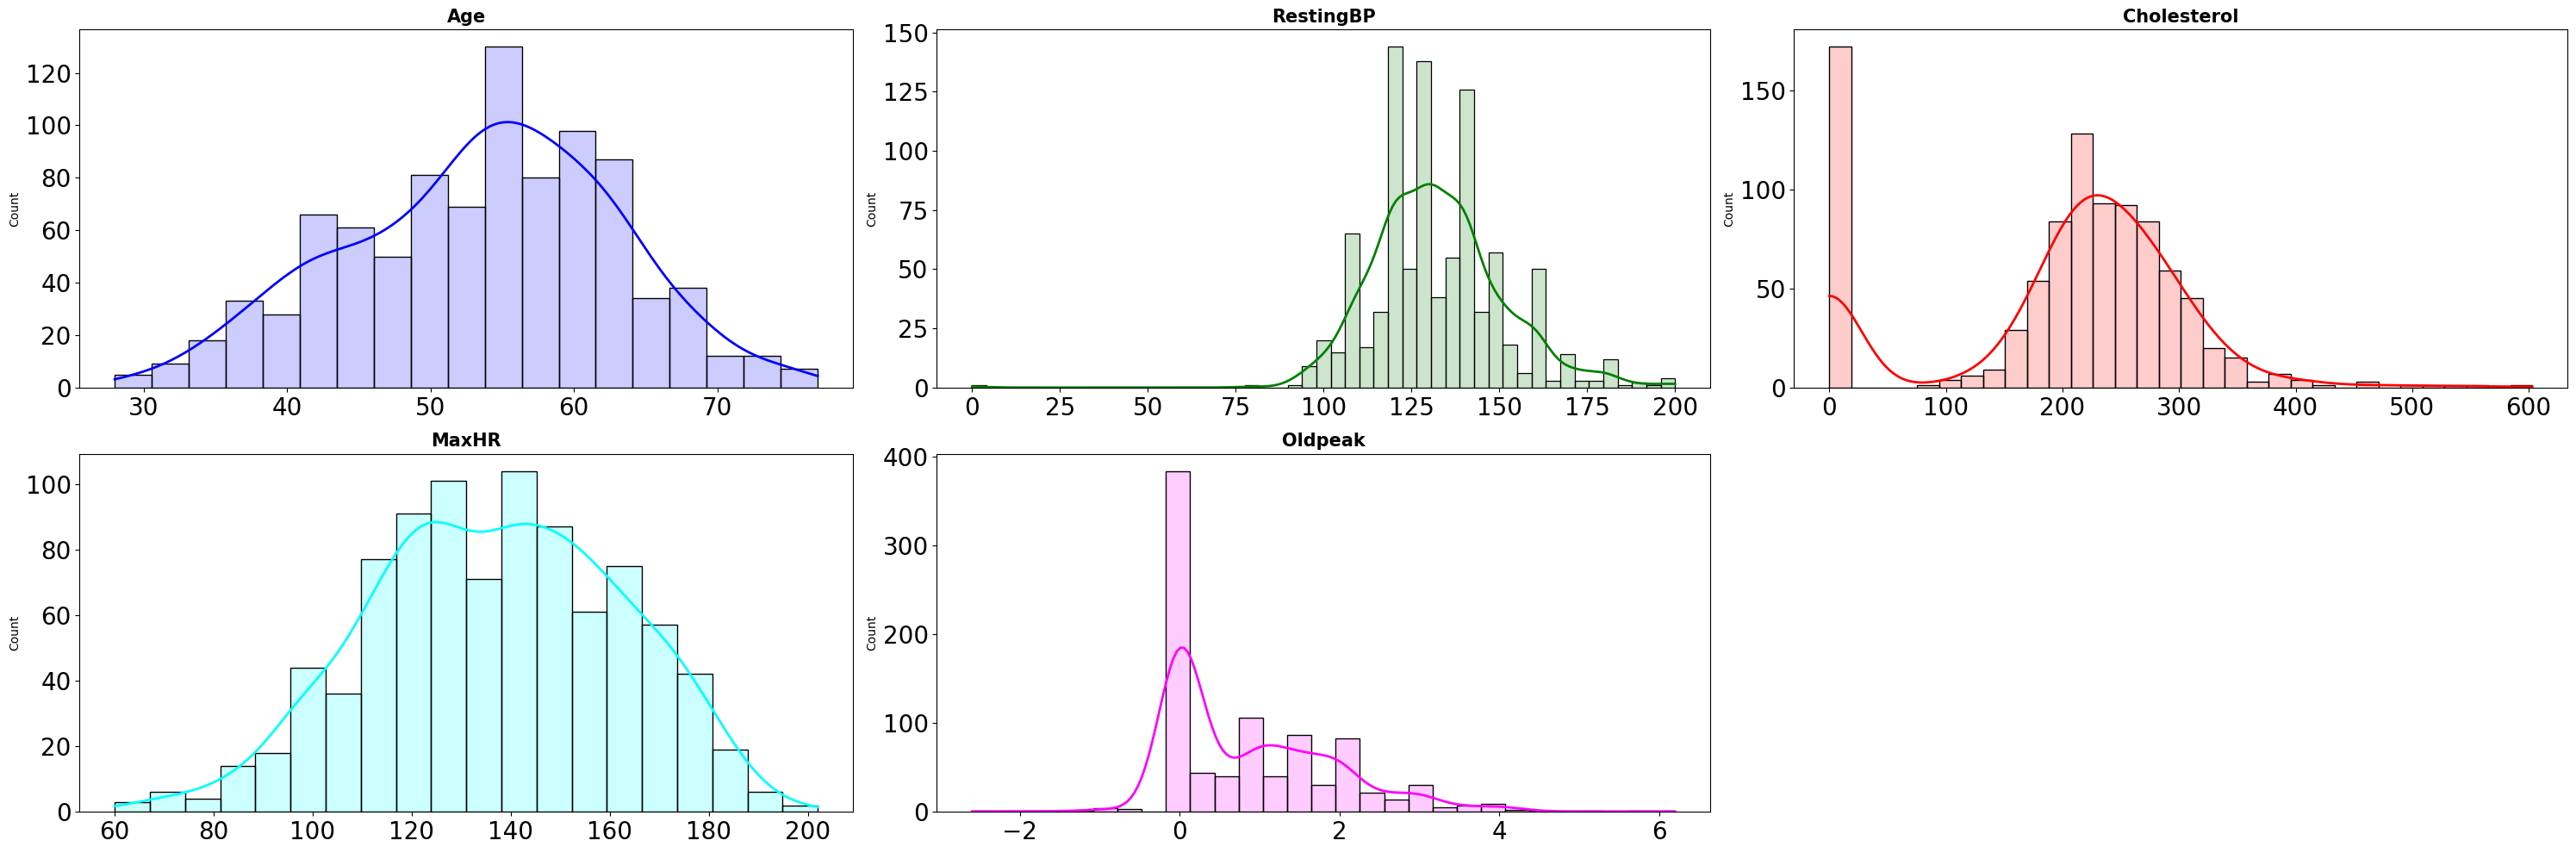

In [175]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("HeartDisease")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    


fig.delaxes(axes[5])

fig.tight_layout();

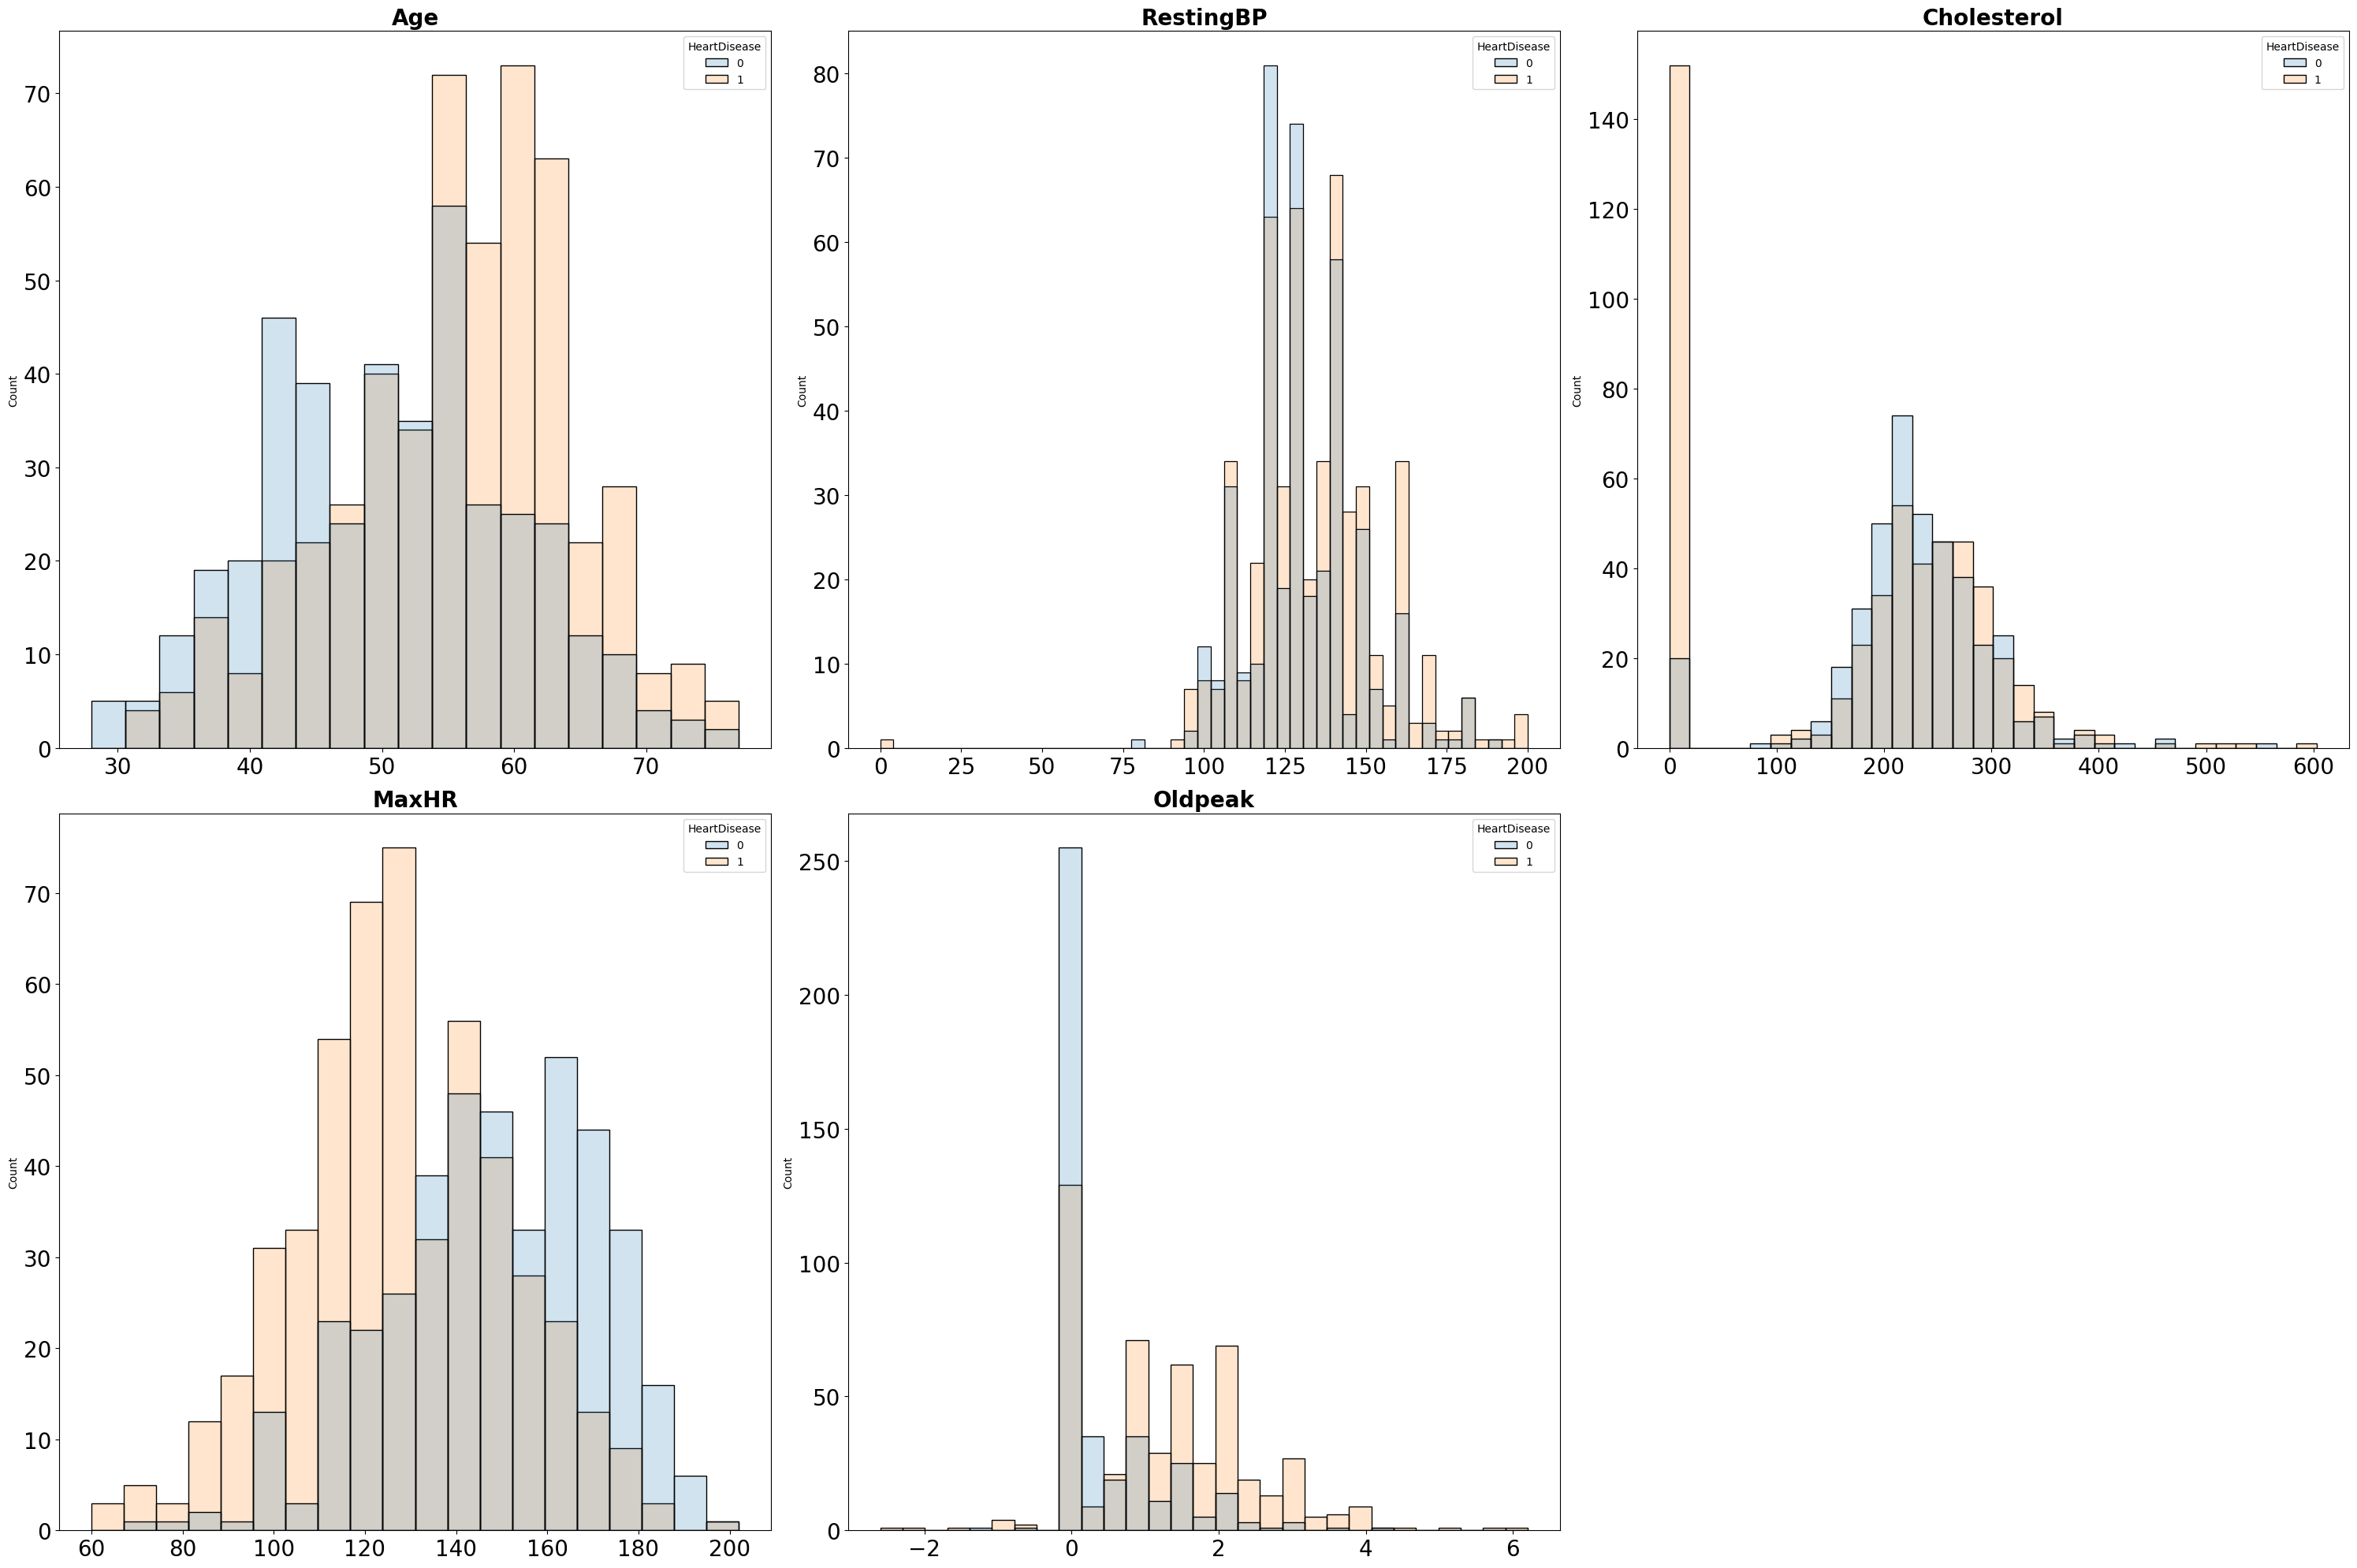

In [176]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 20))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("HeartDisease")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        hue = "HeartDisease", 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.delaxes(axes[5])

fig.tight_layout();

**Resumen del análisis de las variables numéricas**

Estas son las principales conclusiones extraidas:

- Las enfermedades del corazón afectan más a las personas de mayor `edad`. Según el gráfico, podemos ver que el número de casos de enfermedad cardíaca es menor para las personas por debajo, según el gráfico, de 55 años, y mayor para las que están por encima.


- La `presión arterial` en reposo de los pacientes parece tener la misma forma; sin embargo, se observan valores más altos de trtbps en los pacientes con enfermedades cardíacas.


- Si ponderamos el gráfico del `colesterol`, las personas con colesterol alto tienden a ser diagnosticadas más con enfermedades del corazón que las más bajas.


- Las personas con enfermedades cardíacas tendrán una `frecuencia cardíaca` máxima alcanzada más baja en comparación con los pacientes sanos.


- En cuanto a la variable `oldpeak`, a medida que aumenta el valor, aumenta el número de pacientes con cardiopatías.


## Gráfico de correlación  o *Heatmap* 

Los mapas de calor son un tipo de gráfico que es necesario cuando necesitamos encontrar la relación entre las variables dependientes o predictoras. Una de las mejores maneras de encontrar la relación entre las características se puede hacer utilizando mapas de calor.

In [177]:
df_numericas = df.select_dtypes(include = np.number).drop("HeartDisease", axis = 1)
df_numericas.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [178]:
correlation = df_numericas.corr()
correlation

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.000000,0.254399,-0.095282,-0.382045,0.258612
RestingBP,0.254399,1.000000,0.100893,-0.112135,0.164803
Cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148
MaxHR,-0.382045,-0.112135,0.235792,1.000000,-0.160691
Oldpeak,0.258612,0.164803,0.050148,-0.160691,1.000000


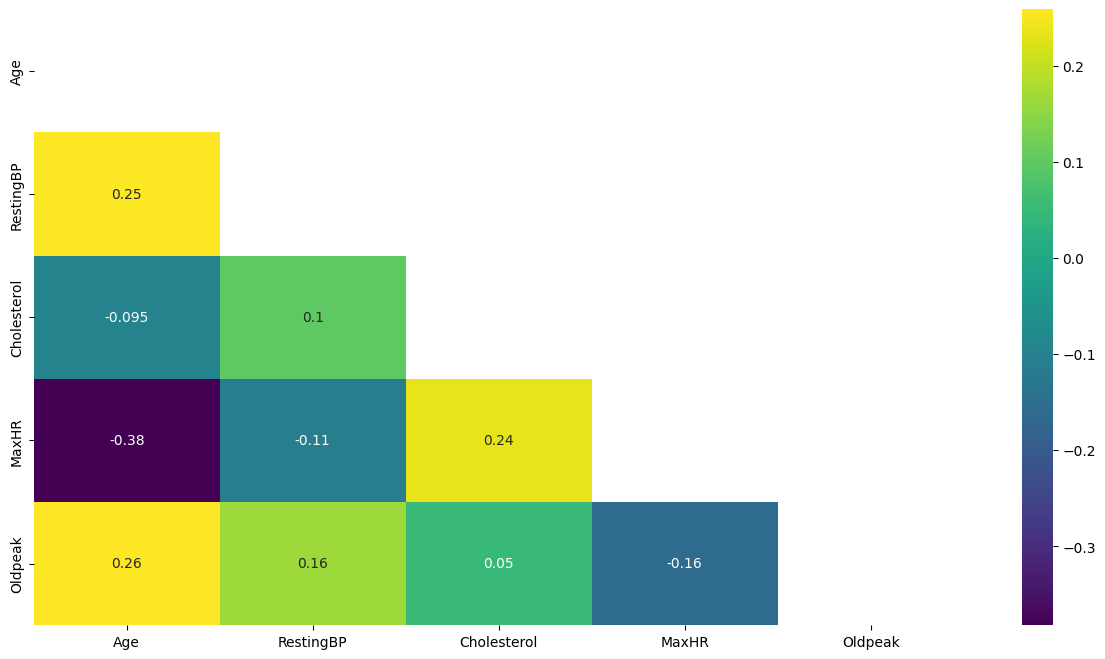

In [179]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, cmap="viridis", annot = True, mask = mask); #barra lateral

# Preprocesamiento

## Outliers

In [180]:
df_numericas.head(2)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0


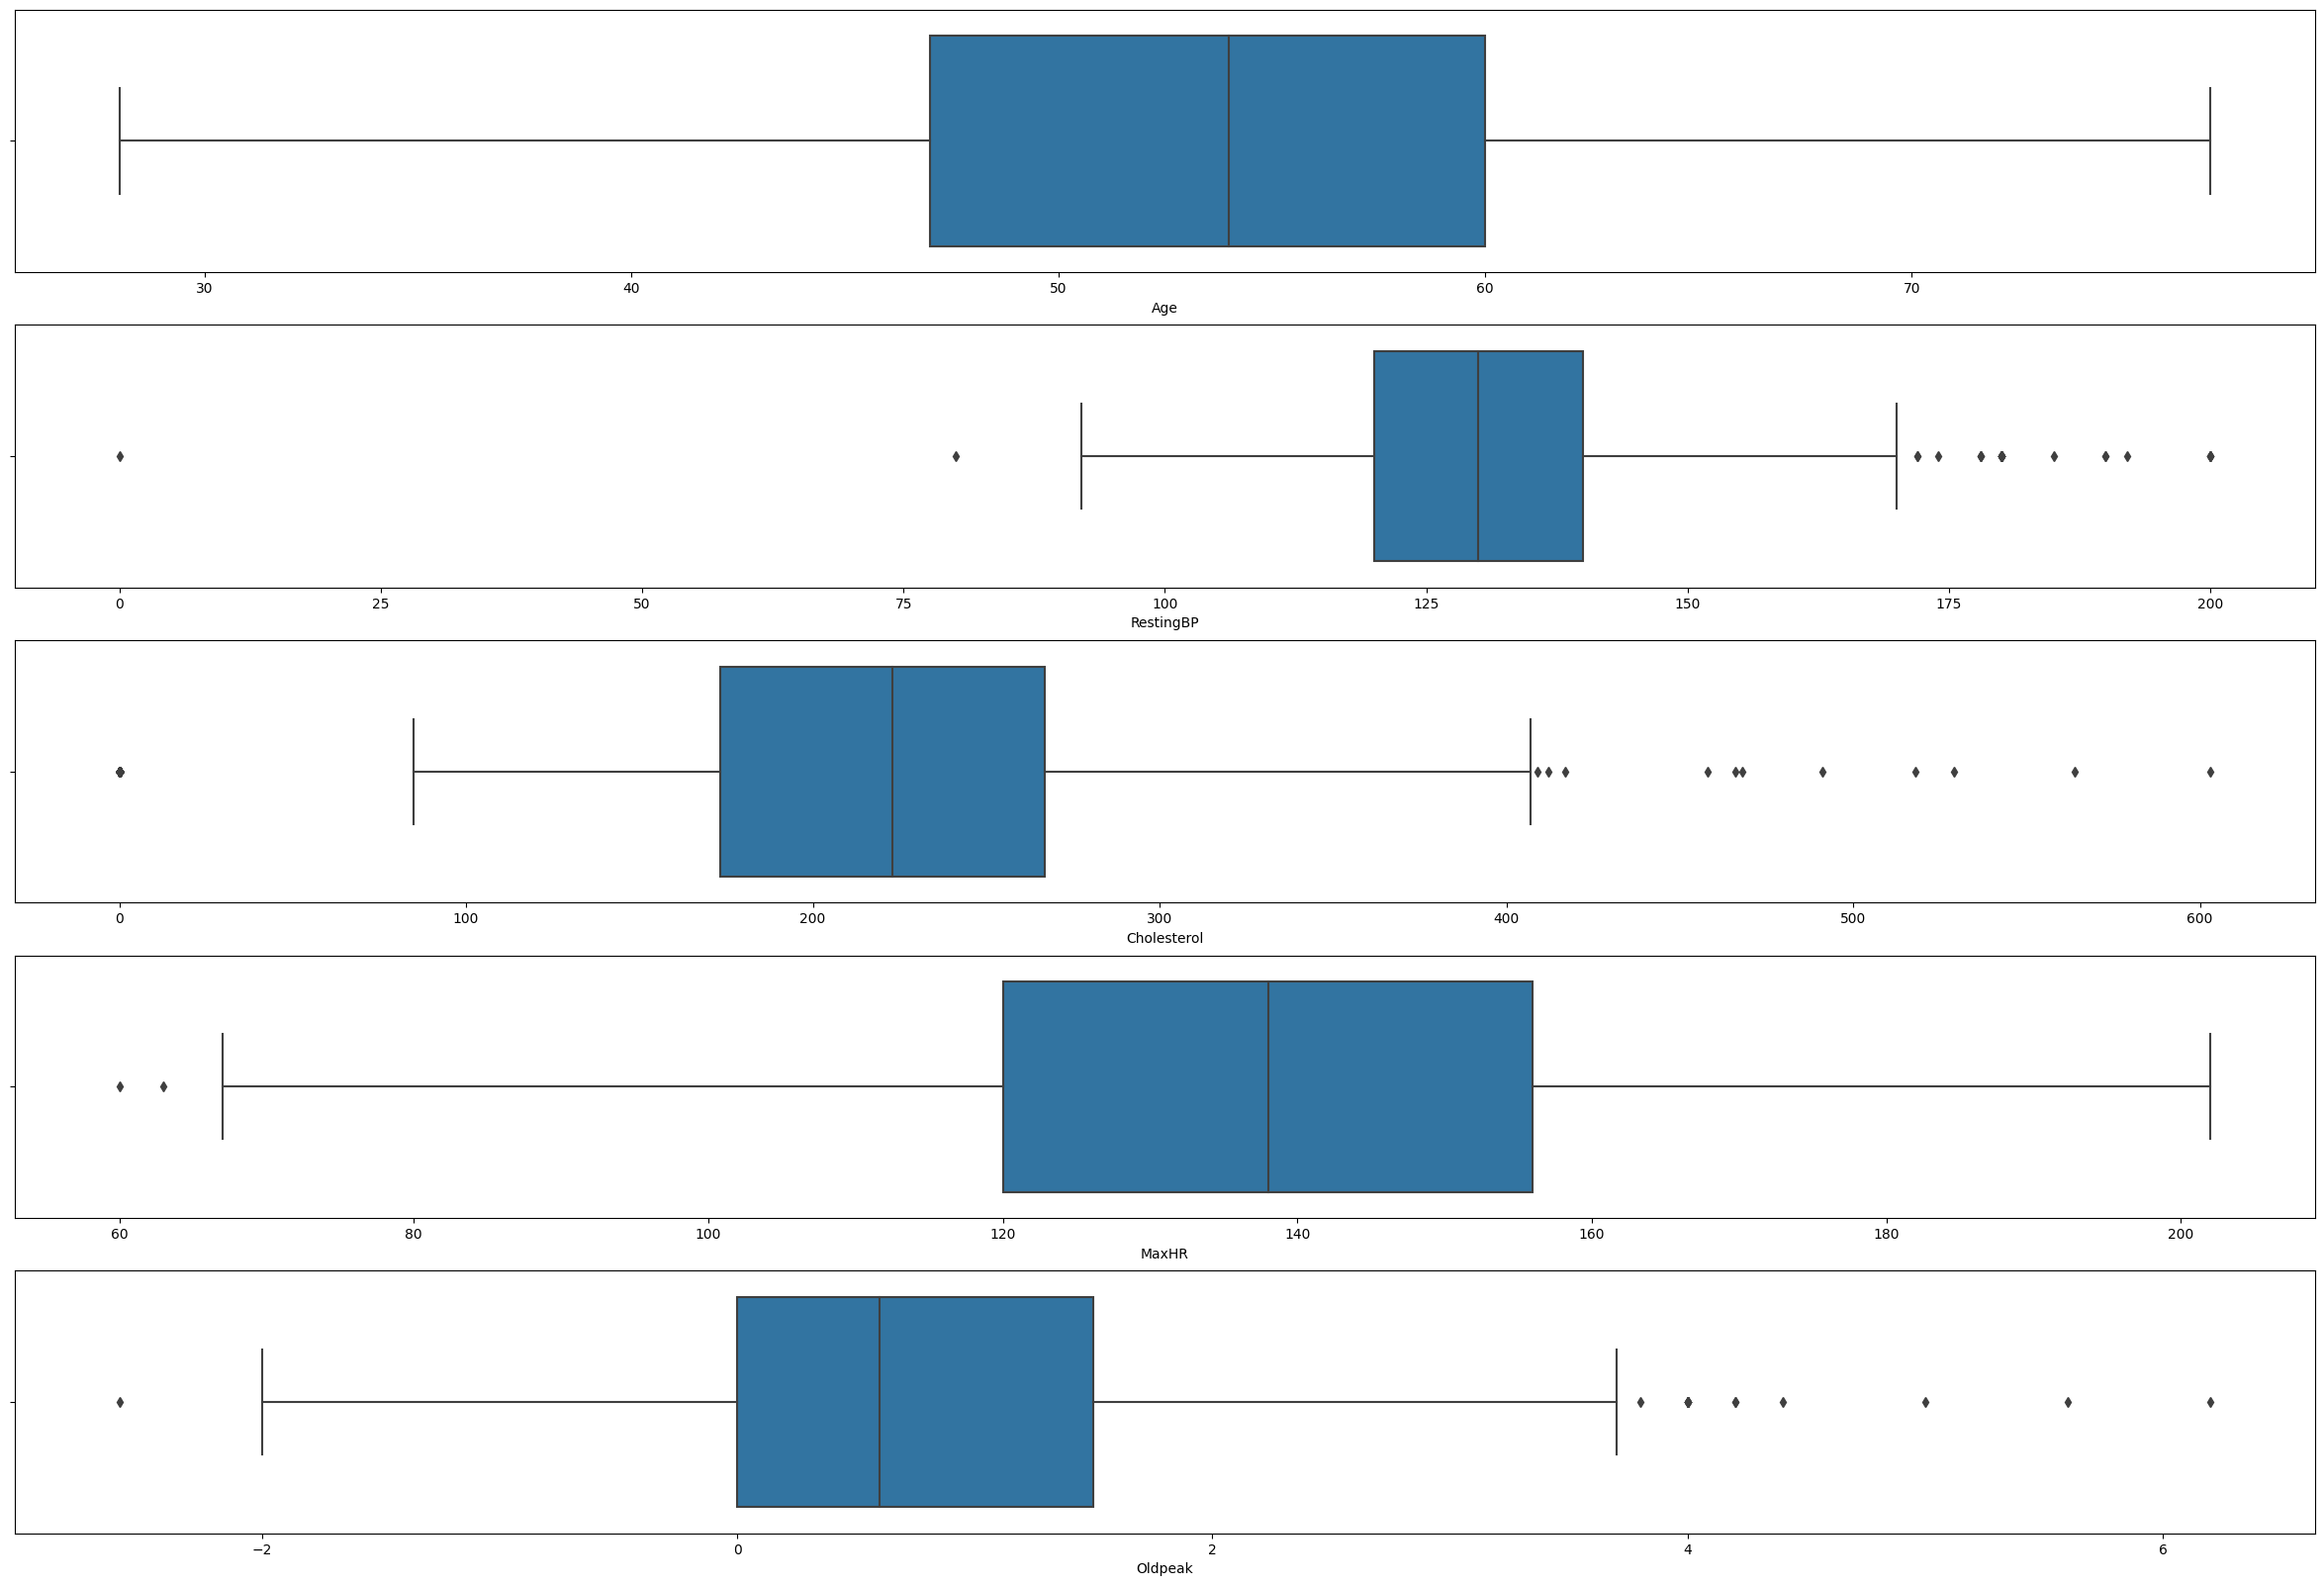

In [181]:
fig, ax = plt.subplots(5, 1, figsize=(30,20))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

In [182]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [183]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

In [184]:
# aplicamos la función y sacamos los índices de los outliers.

ind = detectar_outliers(lista_columnas, df)
print(ind)

{'RestingBP': [109, 123, 189, 190, 241, 274, 275, 278, 314, 365, 372, 399, 411, 423, 449, 475, 550, 585, 592, 673, 702, 725, 732, 759, 774, 780, 855, 880], 'Cholesterol': [28, 30, 69, 76, 103, 149, 250, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 421, 423, 424, 427, 428, 429, 430, 434, 435, 436, 437, 438, 439, 440, 441, 442, 446, 449, 450, 451, 453, 455, 456, 457, 458, 459, 461, 463, 464, 466, 467, 470, 471, 472, 474, 475, 47

In [185]:
ind.keys()

dict_keys(['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])

In [186]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [187]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in ind.items():
    mediana = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = mediana 
        

# Estandarización

In [188]:
df.select_dtypes(include=np.number).columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease'], dtype='object')

In [189]:
scaler = StandardScaler()
scaler.fit(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
X_escaladas = scaler.transform(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] = X_escaladas
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.572240,1.113204,0,Normal,1.389734,N,-0.866238,Up,0
1,-0.478484,F,NAP,1.855220,-1.240259,0,Normal,0.754862,N,0.178162,Flat,1
2,-1.751359,M,ATA,-0.069250,0.983655,0,ST,-1.546550,N,-0.866238,Up,0
3,-0.584556,F,ASY,0.443942,-0.506151,0,Normal,-1.149755,Y,0.700363,Flat,1
4,0.051881,M,NAP,1.213730,-0.916388,0,Normal,-0.594242,N,-0.866238,Up,0


In [190]:
# guardamos el escaler en un pickle

import pickle

with open('data/estandarizacion.pkl', 'wb') as s:
    pickle.dump(scaler, s)

# Codificación  

In [191]:
# Chequeamos valores únicos

print('Sex has', df['Sex'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('FastingBS has', df['FastingBS'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('ChestPainType has', df['ChestPainType'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('RestingECG has', df['RestingECG'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('ExerciseAngina has', df['ExerciseAngina'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('ST_Slope has', df['ST_Slope'].unique(), 'categories')

Sex has ['M' 'F'] categories
---------------------------------------------------------------------------
FastingBS has [0, 1]
Categories (2, int64): [0, 1] categories
---------------------------------------------------------------------------
ChestPainType has ['ATA' 'NAP' 'ASY' 'TA'] categories
---------------------------------------------------------------------------
RestingECG has ['Normal' 'ST' 'LVH'] categories
---------------------------------------------------------------------------
ExerciseAngina has ['N' 'Y'] categories
---------------------------------------------------------------------------
ST_Slope has ['Up' 'Flat' 'Down'] categories


In [192]:
orden_pain = ["ASY", "NAP", "ATA", "TA"] 
orden_rest = ["Normal", "ST", "LVH"]
orden_slope = ["Flat", "Up", "Down"]
orden_fast = ["0", "1"]
orden_exercise = ["N","Y"]


In [193]:
def ordinal_encoder(orden, df, columna):
    ordinal = OrdinalEncoder(categories = [orden], dtype = int)
    transformados_oe = ordinal.fit_transform(df[[columna]])
    df[columna] = transformados_oe
    
    with open(f'data/enconding{columna}.pkl', 'wb') as s:
        pickle.dump(ordinal, s)
    return df



In [194]:
def one_hot_encoder(dff, columnas):
    
    oh = OneHotEncoder()
    
    transformados = oh.fit_transform(dff[columnas])
    
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    
    dff[oh_df.columns] = oh_df
    
    dff.drop(columnas, axis = 1, inplace = True)
    
    with open(f'data/enconding{columnas[0]}.pkl', 'wb') as s:
        pickle.dump(oh, s)
    
    return dff

In [195]:
df = ordinal_encoder(orden_pain, df, "ChestPainType")
df = ordinal_encoder(orden_rest, df, "RestingECG")
df = ordinal_encoder(orden_slope, df, "ST_Slope")
df = ordinal_encoder(orden_fast, df, "FastingBS")
df = ordinal_encoder(orden_exercise, df, "ExerciseAngina")
df = one_hot_encoder(df, ["Sex"])



In [196]:
# chequeamos los datos para ver si los encodings que hemos aplicado se han hecho correctamente
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M
0,-1.433140,2,0.572240,1.113204,0,0,1.389734,0,-0.866238,1,0,0,1
1,-0.478484,1,1.855220,-1.240259,0,0,0.754862,0,0.178162,0,1,1,0
2,-1.751359,2,-0.069250,0.983655,0,1,-1.546550,0,-0.866238,1,0,0,1
3,-0.584556,0,0.443942,-0.506151,0,0,-1.149755,1,0.700363,0,1,1,0
4,0.051881,1,1.213730,-0.916388,0,0,-0.594242,0,-0.866238,1,0,0,1


In [209]:
df.columns

Index(['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Sex_F', 'Sex_M'],
      dtype='object')

[CV] END ..max_depth=2, max_features=1, min_samples_split=10; total time=   0.1s
[CV] END ..max_depth=2, max_features=1, min_samples_split=50; total time=   0.1s
[CV] END ..max_depth=2, max_features=1, min_samples_split=50; total time=   0.1s
[CV] END .max_depth=2, max_features=1, min_samples_split=100; total time=   0.1s
[CV] END ..max_depth=2, max_features=2, min_samples_split=10; total time=   0.1s
[CV] END ..max_depth=2, max_features=2, min_samples_split=50; total time=   0.1s
[CV] END .max_depth=2, max_features=2, min_samples_split=100; total time=   0.1s
[CV] END .max_depth=2, max_features=2, min_samples_split=100; total time=   0.1s
[CV] END ..max_depth=2, max_features=3, min_samples_split=50; total time=   0.1s
[CV] END ..max_depth=2, max_features=3, min_samples_split=50; total time=   0.1s
[CV] END ..max_depth=2, max_features=4, min_samples_split=10; total time=   0.1s
[CV] END ..max_depth=2, max_features=4, min_samples_split=10; total time=   0.1s
[CV] END ..max_depth=2, max_

[CV] END ..max_depth=2, max_features=1, min_samples_split=10; total time=   0.1s
[CV] END ..max_depth=2, max_features=1, min_samples_split=50; total time=   0.1s
[CV] END .max_depth=2, max_features=1, min_samples_split=100; total time=   0.1s
[CV] END ..max_depth=2, max_features=2, min_samples_split=10; total time=   0.1s
[CV] END ..max_depth=2, max_features=2, min_samples_split=50; total time=   0.1s
[CV] END ..max_depth=2, max_features=2, min_samples_split=50; total time=   0.1s
[CV] END ..max_depth=2, max_features=3, min_samples_split=10; total time=   0.1s
[CV] END ..max_depth=2, max_features=3, min_samples_split=10; total time=   0.1s
[CV] END ..max_depth=2, max_features=3, min_samples_split=50; total time=   0.1s
[CV] END ..max_depth=2, max_features=3, min_samples_split=50; total time=   0.1s
[CV] END ..max_depth=2, max_features=4, min_samples_split=10; total time=   0.1s
[CV] END ..max_depth=2, max_features=4, min_samples_split=10; total time=   0.1s
[CV] END .max_depth=2, max_f

[CV] END ..max_depth=2, max_features=1, min_samples_split=10; total time=   0.1s
[CV] END ..max_depth=2, max_features=1, min_samples_split=50; total time=   0.1s
[CV] END ..max_depth=2, max_features=1, min_samples_split=50; total time=   0.1s
[CV] END .max_depth=2, max_features=1, min_samples_split=100; total time=   0.1s
[CV] END ..max_depth=2, max_features=2, min_samples_split=10; total time=   0.1s
[CV] END ..max_depth=2, max_features=2, min_samples_split=50; total time=   0.1s
[CV] END .max_depth=2, max_features=2, min_samples_split=100; total time=   0.1s
[CV] END .max_depth=2, max_features=2, min_samples_split=100; total time=   0.1s
[CV] END ..max_depth=2, max_features=3, min_samples_split=10; total time=   0.1s
[CV] END ..max_depth=2, max_features=3, min_samples_split=10; total time=   0.1s
[CV] END .max_depth=2, max_features=3, min_samples_split=100; total time=   0.1s
[CV] END .max_depth=2, max_features=3, min_samples_split=100; total time=   0.1s
[CV] END ..max_depth=2, max_

# Ajuste de modelo 

In [197]:
# dividimos el dataset en variables predictoras y respuesta
X = df.drop("HeartDisease", axis = 1) # variables predictoras
y = df["HeartDisease"] # variable respuesta 

Después dividiremos los datos en `train`(entrenamiento) y `test`(prueba). 

Utilizamos los datos de entrenamiento para ajustar el modelo y los datos de prueba para comprobarlo. Los modelos generados sirven para predecir los resultados desconocidos que se denominan conjunto de prueba.

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 666)

In [199]:
y_train.describe()

count    734.000000
mean       0.551771
std        0.497652
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

In [200]:
y_test.describe()

count    184.000000
mean       0.559783
std        0.497768
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

Antes de empezar con los modelos veamos las métricas que podemos usar para evaluar su fiabilidad:

- `Matriz de confusión`: Una matriz de confusión es un resumen de los resultados de las predicciones en un problema de clasificación.

    El número de predicciones correctas e incorrectas se resume con valores de recuento y se desglosa por cada clase, es decir, la matriz de confusión muestra las formas en que el modelo se confunde cuando hace predicciones.
    
    - `Verdadero positivo`:
        Interpretaci ón: Predijiste positivo y es cierto.
        Predijiste que una mujer está embarazada y realmente lo está.
    - `Verdadero Negativo`:
        Interpretación: Predijiste negativo y es cierto.
        Predijiste que un hombre no está embarazado y en realidad no lo está.
    - `Falso positivo`: Error de tipo 1
        Interpretación: Predijiste positivo y es falso.
        Predijiste que un hombre está embarazado pero en realidad no lo está.
    - `Falso negativo`: Error de tipo 2
        Interpretación: Predijiste negativo y es falso.
        Predijiste que una mujer no está embarazada pero en realidad lo está.

    ⚠️ **NOTA** El foco de este tipo de errores depende de la pregunta que nos estemos haciendo. Es decir, en un ejemplo de predición de cancer lo ideal es que tanto los verdaderos positivos y verdaderos negativos alcancen los valores más altos. Mientras que deberíamos obtener mayor número de falsos positivos que negativos. Es decir, es mejor predecir que vas a tener iun infarto y no lo vas a tener, que predecir que no tienes un infarto y lo tienes. 
     
    
   ![img](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-18/images/matriz_confusion.png?raw=true)

- `Accuracy`: que porcentaje de los valores predichos están bien predichos

    ![acu](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-18/images/acuraccy.png?raw=true)


- `Precisión` : es lo repetible que es una medición. Un ejemplo es lo cerca que está una segunda flecha de la primera (independientemente de que cualquiera de las dos esté cerca del centro de la diana)
 
  ![precision](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-18/images/precision.png?raw=true)

- `Recall`: la capacidad de un modelo para encontrar todos los casos relevantes dentro de un conjunto de datos. Es decir, definimos el "recall" como el número de verdaderos positivos dividido por el número de verdaderos positivos más el número de falsos negativos.

    ![recall](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-18/images/recall2.png?raw=true)

- `F1`: es la media de la precisión y el recuerdo, teniendo en cuenta ambas métricas en la siguiente ecuación:

    ![f1](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-18/images/F1.png?raw=true)
    
- `kappa`: es una medida de concordancia que se basa en comparar la concordancia observada en un conjunto de datos, respecto a la que podríaocurrir por mero azar.

    -  <0	 No acuerdo
    
    -  0.0-0.2	 Insignificante
    
    -  0.2-0.4	 Bajo
    
    -  0.4-0.6	 Moderado
    
    -  0.6-0.8	 Bueno
    
    -  0.8-1.0	 Muy bueno

## Logistic Regression

La Regresión Logística es un método de análisis estadístico tomado por el Aprendizaje Automático. Se utiliza cuando nuestra variable respuesta es dicotómica o binaria. Esto significa una variable que tiene sólo 2 resultados, por ejemplo, Una persona sobrevivirá a este accidente o no, El estudiante aprobará este examen o no. El resultado puede ser sí o no (2 salidas). Esta técnica de regresión es similar a la regresión lineal y puede utilizarse para predecir las probabilidades en problemas de clasificación.

![logistic](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-18/images/logistic.png?raw=true)


In [97]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=100000)

In [98]:
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

**Sacamos las métricas para este modelo**

In [144]:
def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
  
    matriz = confusion_matrix(clases_reales, clases_predichas)

    plt.figure(figsize = (12, 8))
    sns.heatmap(matriz, square=True, annot=True, fmt="d", cmap = "viridis")

    plt.xlabel('valor predicho')
    plt.ylabel('valor real')
    plt.show()

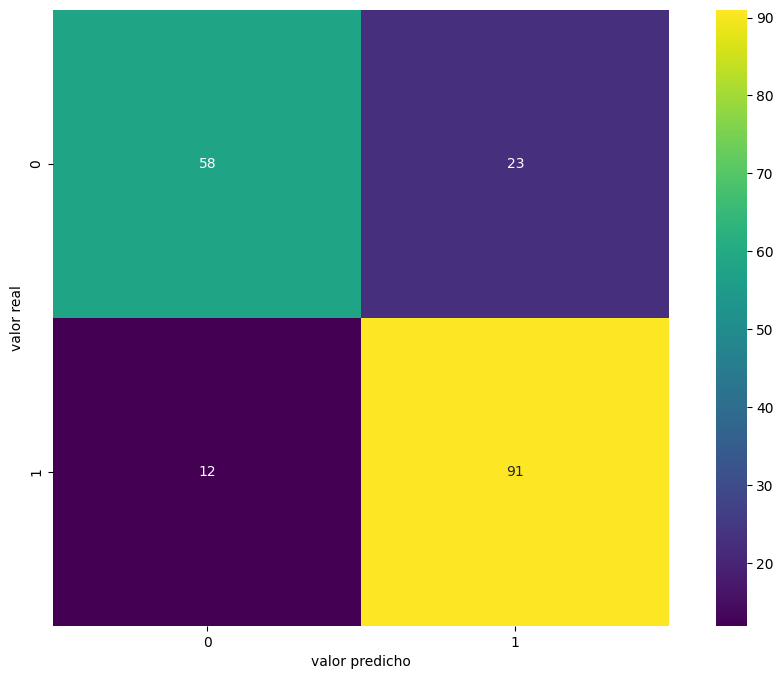

In [146]:
matriz_logistica = matriz_confusion(y_test, y_pred_lr_test, y_test.shape[0])
matriz_logistica

In [147]:
accuracy = accuracy_score(y_test, y_pred_lr_test)
accuracy

0.8097826086956522

In [148]:
precision = precision_score(y_test, y_pred_lr_test)
precision

0.7982456140350878

In [149]:
recall = recall_score(y_test, y_pred_lr_test)
recall

0.883495145631068

In [150]:
f1 = f1_score(y_test, y_pred_lr_test)
f1

0.8387096774193549

In [151]:
kappa = cohen_kappa_score(y_test, y_pred_lr_test)
kappa

0.6083677937241547

In [152]:
# vamos a hacernos una función
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [153]:
results_logistic = metricas(y_test, y_pred_lr_test, y_train, y_pred_lr_train, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.809783,0.798246,0.883495,0.838710,0.608368,test,Regresión logistica
1,0.855586,0.865526,0.874074,0.869779,0.707708,train,Regresión logistica


## Decision Tree Classifier

In [154]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

### Selección de hiperparámetros

Recordamos que para sacar el número máximo de features teníamos que calcular la raíz cuadrada del número de features que tenemos

In [109]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

3.3166247903554

Para sacar la profundidad necesitamos saber si el modelo esta sobreajustado. En caso de que si, reducimos la profundidad. En caso contrario, aumentamos la profundidad! 

In [110]:
y_pred_train_dt = arbol.predict(X_train)
y_pred_test_dt = arbol.predict(X_test)

In [111]:
results_decission_tree1 = metricas(y_test, y_pred_test_dt,y_train, y_pred_train_dt, "Decission Tree I" )
results_decission_tree1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.766304,0.777778,0.815534,0.796209,0.522683,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I


In [112]:
# veamos cual es la profundidad de nuestro árbol
print(arbol.tree_.max_depth)

12


Una vez que ya tenemos algunos hiperparámetros claros hagamos el modelo: 

In [113]:
param = {"max_depth": [2,3, 4,6,8,10],
         "min_samples_split": [10, 50, 100],
         "max_features": [1,2,3,4]}

arbol2 = GridSearchCV(
        estimator = DecisionTreeClassifier(), 
        param_grid = param, 
        n_jobs = -1,
        verbose = 2, 
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [114]:
%%time
arbol2.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
CPU times: user 252 ms, sys: 81.3 ms, total: 333 ms
Wall time: 1.3 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 6, 8, 10],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [115]:
# sacamos el mejor modelo de todos los fiteados
arbol2.best_params_

{'max_depth': 4, 'max_features': 4, 'min_samples_split': 50}

In [116]:
# creamos el modelo con los mejores parámetros para hacer las predicciones
arbol3 = DecisionTreeClassifier( max_depth =  4, max_features=4, min_samples_split=10)
arbol3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features=4, min_samples_split=10)

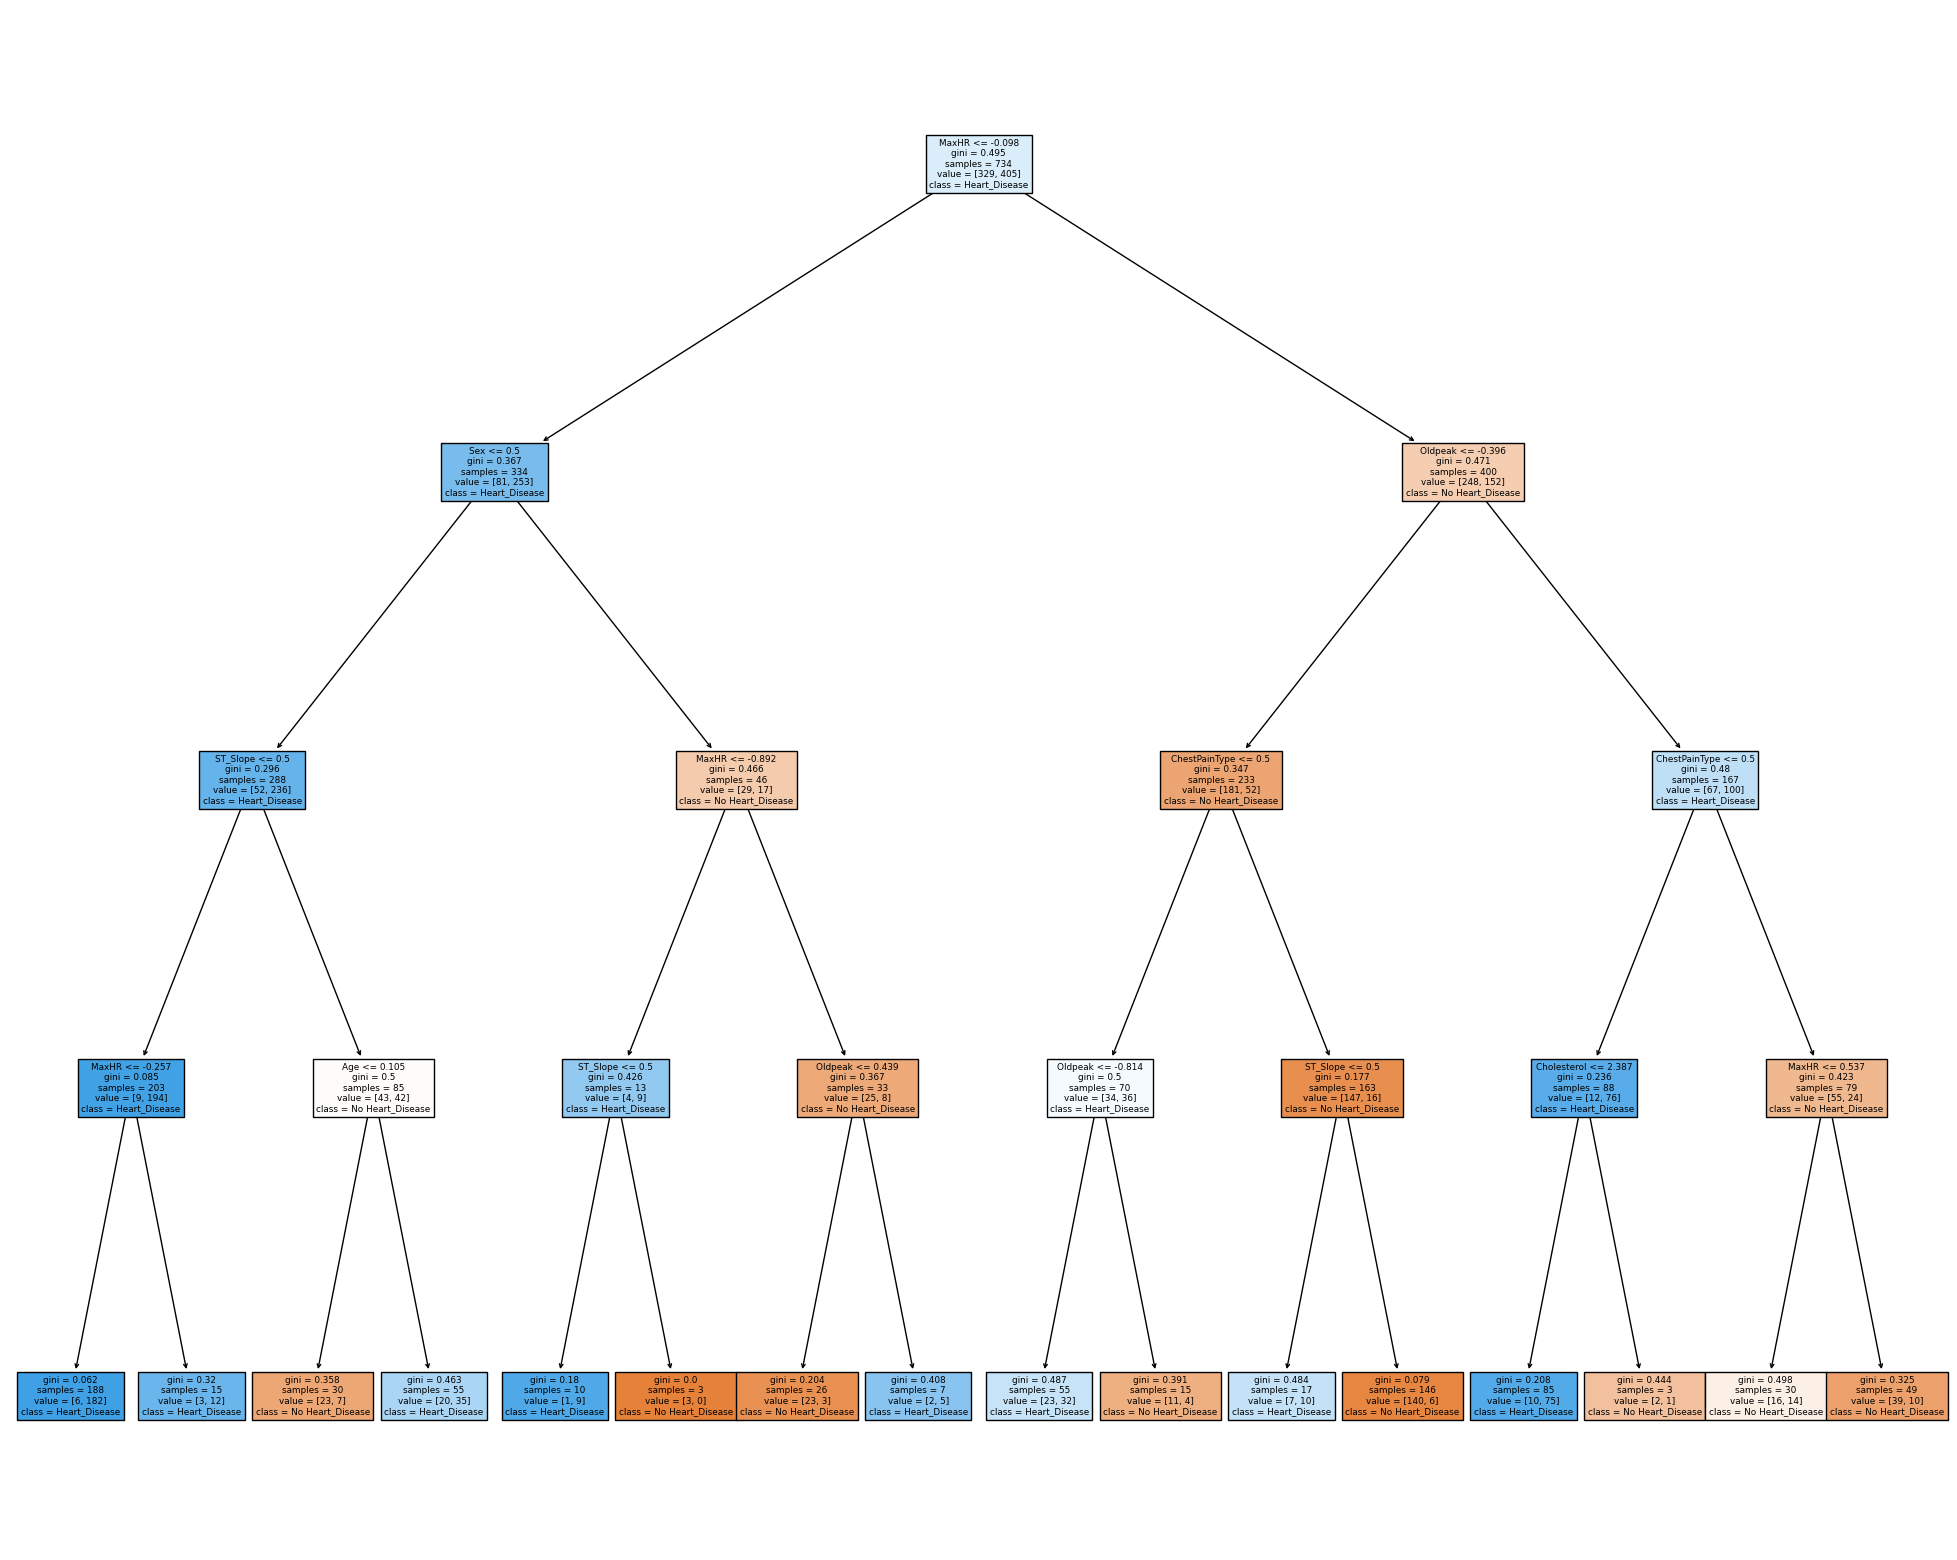

In [117]:
# Ahora vamos a plotear el resultado del modelo en un árbol
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol3,
                   feature_names=X.columns,
                   class_names=['No Heart_Disease', "Heart_Disease"],
                   filled=True)
plt.show()

In [118]:
# hacemos las predicciones para el train y el test
y_pred_arbol_test= arbol3.predict(X_test)
y_pred_arbol_train= arbol3.predict(X_train)

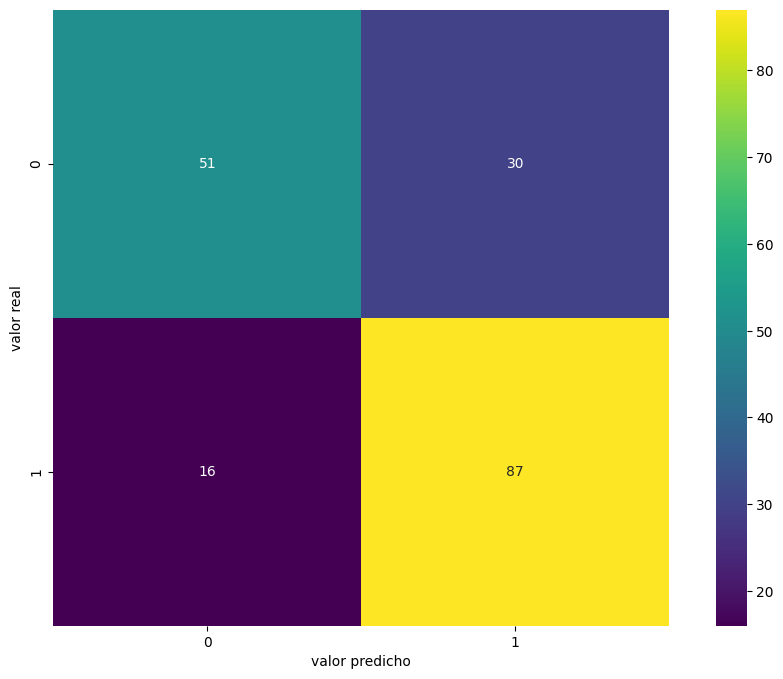

In [155]:
matriz_arbol = matriz_confusion(y_test, y_pred_arbol_test, y_test.shape[0])
matriz_arbol

In [156]:
results_decission_tree2 =  metricas(y_test, y_pred_arbol_test, y_train, y_pred_arbol_train, "Decission Tree II")
results_decission_tree2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.750000,0.743590,0.844660,0.790909,0.483209,test,Decission Tree II
1,0.840599,0.833333,0.888889,0.860215,0.675243,train,Decission Tree II


In [157]:
# juntamos los resultados con los del modelo anterior
df_all_results = pd.concat([results_logistic, results_decission_tree2], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.809783,0.798246,0.883495,0.838710,0.608368,test,Regresión logistica
1,0.855586,0.865526,0.874074,0.869779,0.707708,train,Regresión logistica
0,0.750000,0.743590,0.844660,0.790909,0.483209,test,Decission Tree II
1,0.840599,0.833333,0.888889,0.860215,0.675243,train,Decission Tree II


## Random Forest 

In [201]:
random_forest = GridSearchCV(
        estimator = RandomForestClassifier(), 
        param_grid = param, 
        n_jobs = -1,
        verbose = 2,  
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [202]:
%%time
random_forest.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
CPU times: user 604 ms, sys: 123 ms, total: 727 ms
Wall time: 8.91 s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 6, 8, 10],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [203]:
# sacamos el mejor modelo de todos los fiteados
random_forest.best_params_

{'max_depth': 8, 'max_features': 2, 'min_samples_split': 10}

In [204]:
# creamos el modelo con los mejores parámetros para hacer las predicciones
clf=RandomForestClassifier(min_samples_split= 50,
                           max_features=2,
                           max_depth=4)
clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=4, max_features=2, min_samples_split=50)

In [205]:
y_pred_clf_test= clf.predict(X_test)
y_pred_clf_train= clf.predict(X_train)

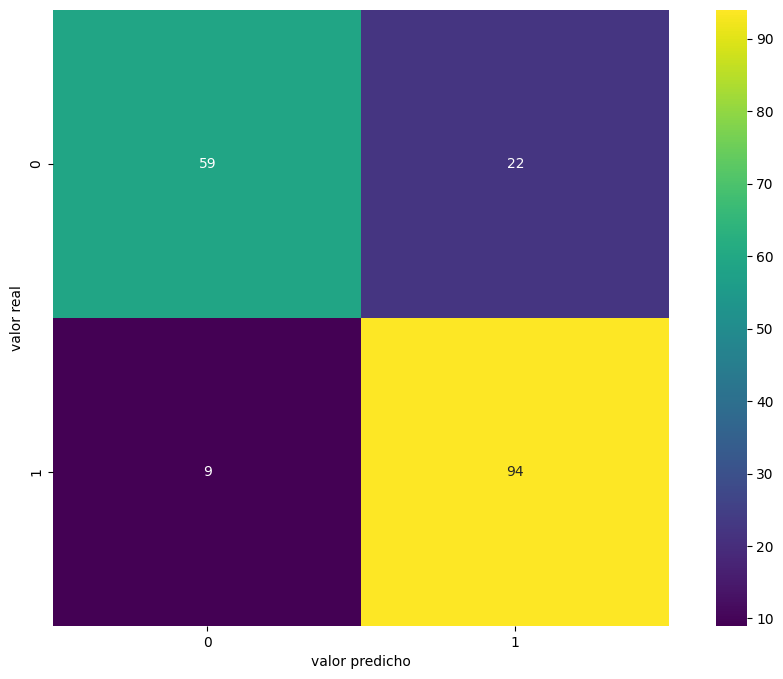

In [206]:
matriz_random = matriz_confusion(y_test, y_pred_clf_test, y_test.shape[0])
matriz_random

In [207]:
results_forest = metricas(y_test, y_pred_clf_test, y_train, y_pred_clf_train, "Random Forest")
df_all_results = pd.concat([df_all_results, results_forest], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.809783,0.798246,0.883495,0.838710,0.608368,test,Regresión logistica
1,0.855586,0.865526,0.874074,0.869779,0.707708,train,Regresión logistica
0,0.750000,0.743590,0.844660,0.790909,0.483209,test,Decission Tree II
1,0.840599,0.833333,0.888889,0.860215,0.675243,train,Decission Tree II
0,0.847826,0.826087,0.922330,0.871560,0.686275,test,Random Forest
1,0.877384,0.863741,0.923457,0.892601,0.750115,train,Random Forest
0,0.831522,0.810345,0.912621,0.858447,0.652195,test,Random Forest
1,0.885559,0.874126,0.925926,0.899281,0.767042,train,Random Forest


## KNeighborsClassifier 

El algoritmo KNN utiliza la "similitud de características" para predecir los valores de cualquier punto de datos nuevo. Esto significa que al nuevo punto se le asigna un valor basado en su parecido con los puntos del conjunto de entrenamiento. 

A continuación se explica el algoritmo paso a paso:

1. En primer lugar, se calcula la distancia entre el nuevo punto y cada punto de entrenamiento.
![imagen](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-18/images/knn.png?raw=true)
2. Se seleccionan los k puntos de datos más cercanos (en función de la distancia). En este ejemplo, se seleccionarán los puntos 1, 5, 6 si el valor de k es 3. Más adelante exploraremos el método para seleccionar el valor correcto de k.

![imqagen2](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-18/images/knn2.png?raw=true)

Lo primero que tenemos que hacer es conocer cual es el número óptimo de vecinos que tenemos que establecer en nuestro modelo. Para eso realizamos un `for loop` testanto diferente número de vecinos y calculando el `accuracy` del modelo para conocer cual es el mejor

In [131]:
knn_neighbors = range(1,21)
knn_scores = []

for k in knn_neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())


In [132]:
knn = pd.DataFrame(knn_scores, knn_neighbors).reset_index()
knn.columns = ["number_neighbors", "score"]
knn.sort_values(by = "score", ascending = False).head(3)

,number_neighbors,score
4,5,0.834317
6,7,0.831008
12,13,0.829933


📌 El mejor número de vecinos para nuestros datos es `7`. Por lo tanto, volveremos a entrenar el modelo con los dataos para ese número de vecinos y evaluar el modelo

In [133]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [134]:
y_pred_knn_test = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

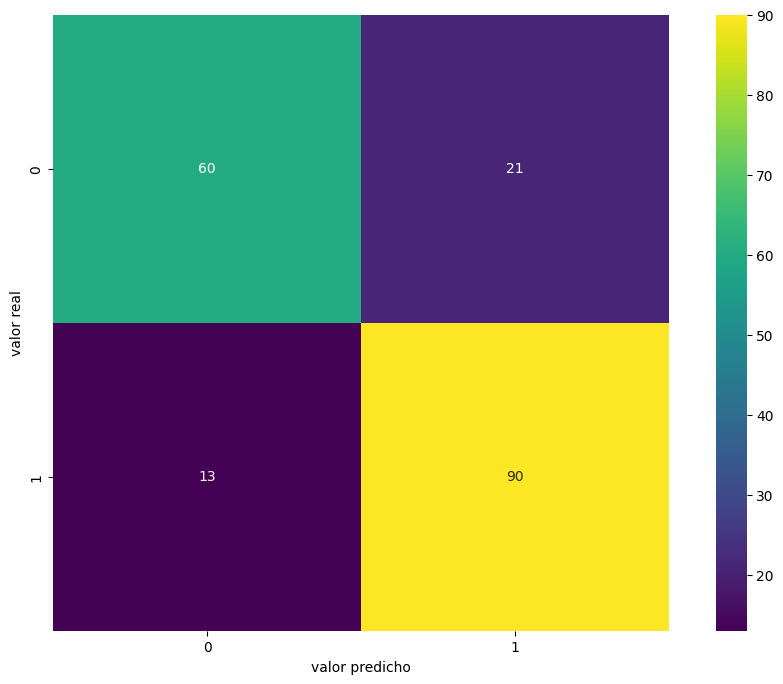

In [160]:
matriz_knn = matriz_confusion(y_test, y_pred_knn_test, y_test.shape[0])
matriz_knn

In [136]:
results_knn = metricas(y_test, y_pred_knn_test, y_train, y_pred_knn_train, "KNN")
df_all_results = pd.concat([df_all_results, results_knn])
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.809783,0.798246,0.883495,0.838710,0.608368,test,Regresión logistica
1,0.855586,0.865526,0.874074,0.869779,0.707708,train,Regresión logistica
0,0.750000,0.743590,0.844660,0.790909,0.483209,test,Decission Tree II
1,0.840599,0.833333,0.888889,0.860215,0.675243,train,Decission Tree II
0,0.847826,0.826087,0.922330,0.871560,0.686275,test,Random Forest
1,0.877384,0.863741,0.923457,0.892601,0.750115,train,Random Forest
0,0.815217,0.810811,0.873786,0.841121,0.621078,test,KNN
1,0.880109,0.893300,0.888889,0.891089,0.757758,train,KNN


## Gradient Boosting 

El algoritmo Gradient Boost es uno de los algoritmos más potentes en el campo del aprendizaje automático. Un modelo Gradient Boosting está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

In [138]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=1, random_state=23)
gb.fit(X_train, y_train);

In [139]:
y_pred_gb_test= gb.predict(X_test)
y_pred_gb_train= gb.predict(X_train)

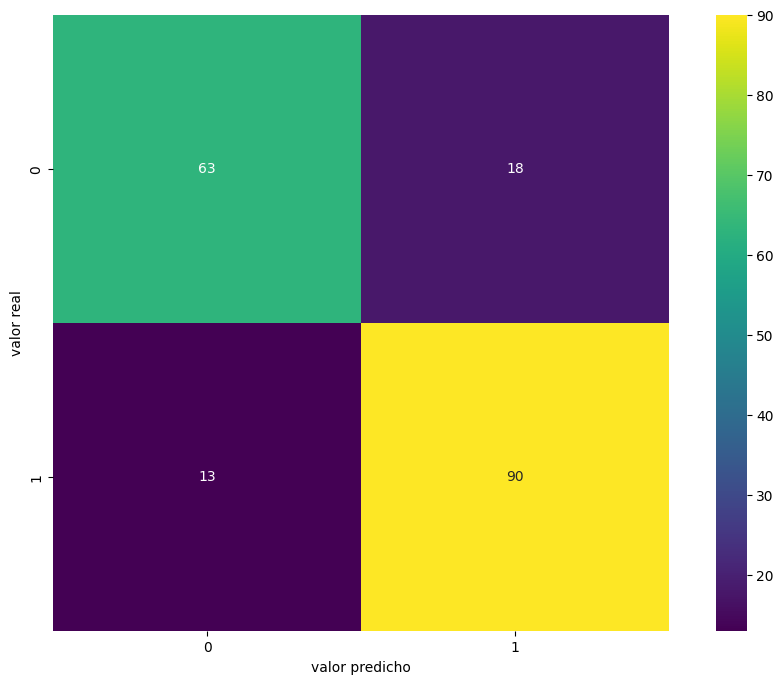

[CV] END ..max_depth=2, max_features=1, min_samples_split=10; total time=   0.0s
[CV] END .max_depth=2, max_features=1, min_samples_split=100; total time=   0.0s
[CV] END .max_depth=2, max_features=1, min_samples_split=100; total time=   0.0s
[CV] END ..max_depth=2, max_features=2, min_samples_split=10; total time=   0.0s
[CV] END ..max_depth=2, max_features=2, min_samples_split=50; total time=   0.0s
[CV] END ..max_depth=2, max_features=2, min_samples_split=50; total time=   0.0s
[CV] END .max_depth=2, max_features=2, min_samples_split=100; total time=   0.0s
[CV] END .max_depth=2, max_features=2, min_samples_split=100; total time=   0.0s
[CV] END ..max_depth=2, max_features=3, min_samples_split=50; total time=   0.0s
[CV] END ..max_depth=2, max_features=3, min_samples_split=50; total time=   0.0s
[CV] END ..max_depth=2, max_features=3, min_samples_split=50; total time=   0.0s
[CV] END ..max_depth=2, max_features=3, min_samples_split=50; total time=   0.0s
[CV] END ..max_depth=2, max_

[CV] END ..max_depth=2, max_features=1, min_samples_split=10; total time=   0.0s
[CV] END .max_depth=2, max_features=1, min_samples_split=100; total time=   0.0s
[CV] END .max_depth=2, max_features=1, min_samples_split=100; total time=   0.0s
[CV] END ..max_depth=2, max_features=4, min_samples_split=10; total time=   0.0s
[CV] END ..max_depth=2, max_features=4, min_samples_split=10; total time=   0.0s
[CV] END ..max_depth=2, max_features=4, min_samples_split=10; total time=   0.0s
[CV] END ..max_depth=2, max_features=4, min_samples_split=10; total time=   0.0s
[CV] END ..max_depth=3, max_features=1, min_samples_split=10; total time=   0.0s
[CV] END ..max_depth=3, max_features=1, min_samples_split=10; total time=   0.0s
[CV] END ..max_depth=3, max_features=1, min_samples_split=10; total time=   0.0s
[CV] END ..max_depth=3, max_features=1, min_samples_split=10; total time=   0.0s
[CV] END ..max_depth=3, max_features=3, min_samples_split=50; total time=   0.0s
[CV] END ..max_depth=3, max_

[CV] END ..max_depth=2, max_features=1, min_samples_split=10; total time=   0.0s
[CV] END .max_depth=2, max_features=2, min_samples_split=100; total time=   0.0s
[CV] END .max_depth=2, max_features=2, min_samples_split=100; total time=   0.0s
[CV] END ..max_depth=2, max_features=3, min_samples_split=10; total time=   0.0s
[CV] END ..max_depth=2, max_features=3, min_samples_split=10; total time=   0.0s
[CV] END .max_depth=2, max_features=3, min_samples_split=100; total time=   0.0s
[CV] END .max_depth=2, max_features=3, min_samples_split=100; total time=   0.0s
[CV] END ..max_depth=2, max_features=4, min_samples_split=10; total time=   0.0s
[CV] END ..max_depth=2, max_features=4, min_samples_split=10; total time=   0.0s
[CV] END .max_depth=2, max_features=4, min_samples_split=100; total time=   0.0s
[CV] END .max_depth=2, max_features=4, min_samples_split=100; total time=   0.0s
[CV] END .max_depth=2, max_features=4, min_samples_split=100; total time=   0.0s
[CV] END .max_depth=2, max_f

In [161]:
matriz_gradient = matriz_confusion(y_test, y_pred_gb_test, y_test.shape[0])
matriz_gradient

In [141]:
results_gradient = metricas(y_test, y_pred_gb_test, y_train, y_pred_gb_train, "Gradient")
df_all_results = pd.concat([df_all_results, results_gradient], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.809783,0.798246,0.883495,0.838710,0.608368,test,Regresión logistica
1,0.855586,0.865526,0.874074,0.869779,0.707708,train,Regresión logistica
0,0.750000,0.743590,0.844660,0.790909,0.483209,test,Decission Tree II
1,0.840599,0.833333,0.888889,0.860215,0.675243,train,Decission Tree II
0,0.847826,0.826087,0.922330,0.871560,0.686275,test,Random Forest
1,0.877384,0.863741,0.923457,0.892601,0.750115,train,Random Forest
0,0.815217,0.810811,0.873786,0.841121,0.621078,test,KNN
1,0.880109,0.893300,0.888889,0.891089,0.757758,train,KNN
0,0.831522,0.833333,0.873786,0.853081,0.655888,test,Gradient
1,0.885559,0.888620,0.906173,0.897311,0.768108,train,Gradient


In [208]:
# guardamos el mejor modelo
with open('data/mejor_modelo.pkl', 'wb') as modelo:
        pickle.dump(clf, modelo)